In [1]:
import ema as em
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
mdl = em.rModel(2,3)
e = mdl.delems
n = mdl.dnodes
h = 6
w = 16
mdl.node('1', 0.0,  0.0 )
mdl.node('2', 0.0,   h  ) 
mdl.node('3', w/2,   h  )
mdl.node('4',  w ,   h  )
mdl.node('5', 0.0,  2*h )
mdl.node('6', w/2,  2*h )

mdl.beam('a', n['1'],  n['2'], Qpl=[1e6, 250, 250])
mdl.beam('b', n['2'],  n['3'], Qpl=[1e6, 200, 200])
mdl.beam('c', n['3'],  n['4'], Qpl=[1e6, 200, 200])
mdl.beam('d', n['3'],  n['6'], Qpl=[1e6, 250, 250])
mdl.beam('e', n['5'],  n['6'], Qpl=[1e6, 200, 200])
mdl.hinge(e['c'], n['4'])

mdl.boun(n['1'], [1, 1, 1])
mdl.boun(n['4'], [0, 1, 1])
mdl.boun(n['5'], [1, 1, 1])

n['2'].p['x'] = 50
n['6'].p['y'] =-50
mdl.DOF = mdl.numdofs()
mdl.DOF

[[6, 7, 8], [1, 7, 2], [1, 3, 4], [1, 9, 10], [11, 12, 13], [11, 3, 5]]

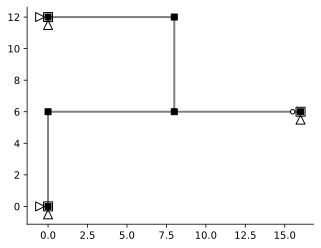

In [3]:
fig, ax = plt.subplots()
em.plot_structure(mdl, ax)

In [7]:
e2e = em.Event2Event(mdl)
e2e.run();

In [5]:
Q = e2e.Q[-1]
Q.c

,$Q_{{}}$
$a_2$,152.475248
$a_3$,-20.084866
$b_2$,20.084866
$b_3$,200.000000
$c_2$,-38.472419
$d_2$,-161.527581
$d_3$,-200.000000
$e_2$,200.000000
$e_3$,200.000000
